# 12.1 Fixed-shape Universal Approximators

You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Using the classic polynomial as our exemplar, in Section 11.4.1 we introduced fixed-shape universal approximators as collections of various nonlinear features which have no internal (tunable) parameters. In this Section we pick up that discussion, beginning a deeper dive into the technicalities associated with fixed-shape approximators and challenges we have to address when employing them in practice.

- What generally characterizes fixed-shaped universal approximators are:
    - their lack of internal parameters, and 
    - straightforward organization of units in terms of, e.g., degree 

- These characteristics make fixed-shape approximators, like the polynomials extremely popular in many areas adjacent to machine learning such as applied mathematics, physics, and engineering. 

#### <span style="color:#a50e3e;">Example. </span>  Sinusoidal approximators

The collection of sine waves of increasing frequency is a common example of a classic fixed-shape approximator.

\begin{equation}
f_1(x) = \text{sin}(x), \quad f_2(x) = \text{sin}(2x), \quad f_3(x) = \text{sin}(3x), \quad \text{etc.}
\end{equation}

<IPython.core.display.Javascript object>


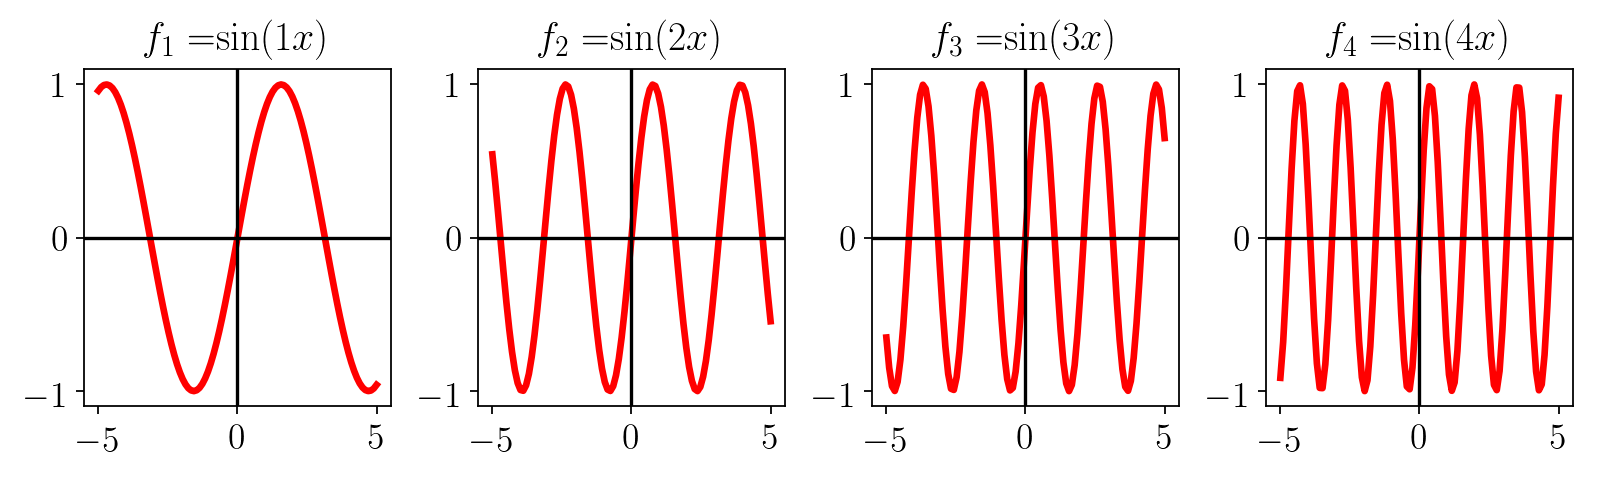

In [11]:
import matplotlib.pyplot as plt

## This code cell will not be shown in the HTML version of this notebook
# build the first 4 non-constant polynomial basis elements
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    fm = np.sin(m*x)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],color = 'r',linewidth = 3)
    ax.set_title('$f_'+str(m) + ' = '  + '$sin$ ' +  '(' + str(m) + 'x)$',fontsize = 18)

    # clean up plot
    #ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)

    ax.set_xticks([-5,0,5])
    ax.set_yticks([-1,0,1])
    
plt.show()

Akin to the polynomials, we can generalize this catalog of functions to $N$ dimensional input 

\begin{equation}
f_m\left(\mathbf{x}\right) = \text{sin}\left(m_1x_1\right)\text{sin}\left(m_2x_2\right)\cdots \text{sin}\left(m_Nx_N\right)
\end{equation}

Here $m_1,\,m_2,\,...,m_N$ are nonnegative integers. 

#### <span style="color:#a50e3e;">Example. </span>  Fourier approximators

The Fourier approximators or basis consists of the set of paired sine and cosine waves with ever-increasing frequency of the form

\begin{equation}
f_{2m-1}\left(x\right)=\mbox{sin}\left(2 \pi mx\right) \quad \text{and} \quad f_{2m}\left(x\right)=\mbox{cos}\left(2 \pi mx\right) \quad  
\end{equation}

It is also common to write the Fourier units using classic complex exponential definitions of both cosine and sine

\begin{equation}
f_{m}\left(x\right)=e^{2\pi imx}
\end{equation}


For a general $N$ dimensional input each multidimensional Fourier unit takes the form 

\begin{equation}
f_{m}\left(\mathbf{x}\right)=e^{2\pi im_{1}x_{1}}e^{2\pi im_{2}x_{2}}\cdots e^{2\pi im_{N}x_{N}}
\end{equation}

Here $m_1,\,m_2,\,...,m_N$ are nonnegative integers.

### Large input dimensions and the scaling challenge

With $N$ dimensional input a polynomial unit takes the form 

\begin{equation}
f_m\left(\mathbf{x}\right) = x_1^{m_1}x_2^{m_2}\cdots x_N^{m_N}
\end{equation}

To construct a polynomial model of degree $D$ we collect all such terms where
$$m_1 + m_2 + \cdots + m_N \leq D$$ 

- It is easy to verify that the precise number $M$ of (non-bias) features/feature weights of a degree $D$ polynomial is $\left(\begin{array}{c}
N+D\\
D
\end{array}\right)-1=\frac{\left(N+D\right)!}{N!D!}-1$.

- Even if the input dimension is of reasonably small size, for instance $N=100$ or $N=500$, then just the associated degree $D=5$ polynomial feature map of these input dimensions has dimension $M= 96,560,645$ and $M=268,318,178,226$ respectively! 

- This serious scaling issue motivates the so-called *kernel trick*.  